<a href="https://colab.research.google.com/github/Gayathhhrii/Machine_Learning/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

df=pd.read_csv("/content/banknote_authentication.csv")

In [6]:
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [7]:
#check for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [10]:
#count the number of values in each class
df['authentic'].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [11]:
#count the number of values in each class
df['authentic'].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [12]:
#split data into inputs and outputs
X=df.drop("authentic",axis=1)
y=df["authentic"]

In [13]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
#import RandomForestClassifier model and train it
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(random_state=0, min_samples_leaf=10)
Classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [21]:
#predict the values
y_test_hat=Classifier.predict(X_test)
Results=pd.DataFrame({'actual':y_test})
columns=pd.DataFrame({'prediction':y_test_hat})
Results=Results.join(columns.set_index(Results.index))
print(Results)

      actual  prediction
1240       1           1
703        0           0
821        1           1
1081       1           1
37         0           0
...      ...         ...
559        0           0
400        0           0
439        0           0
634        0           0
628        0           0

[412 rows x 2 columns]


In [22]:
#check accuracy of testing data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9878640776699029


In [23]:
#check accuracy of training data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.9885416666666667


In [24]:
#check accuracy of training data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.9885416666666667


In [25]:
#print confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm=confusion_matrix(y_test,y_test_hat)
print(cm)

[[231   4]
 [  1 176]]


In [27]:
#calculate recall, precision, specificity
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
recall=TP/float(FN+TP)
precision=TP/float(TP+FP)
specificity=TN/float(TN+FP)
print("recall,precision,specificity=", recall, precision, specificity)


recall,precision,specificity= 0.9943502824858758 0.9777777777777777 0.9829787234042553


In [28]:
#print importance of each feature
feature_importances=pd.DataFrame(Classifier.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
entropy,0.043526
kurtosis,0.133505
skew,0.223925
variance,0.599044


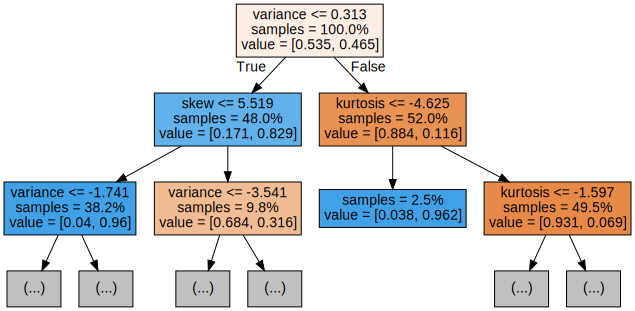

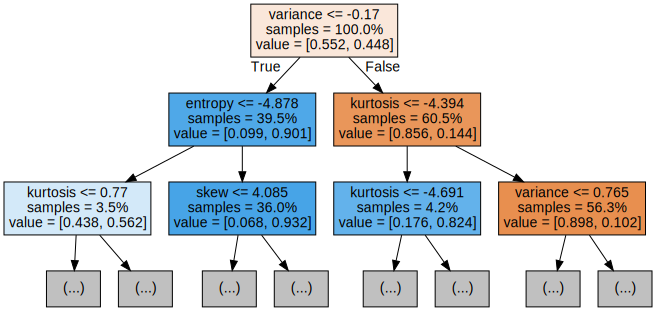

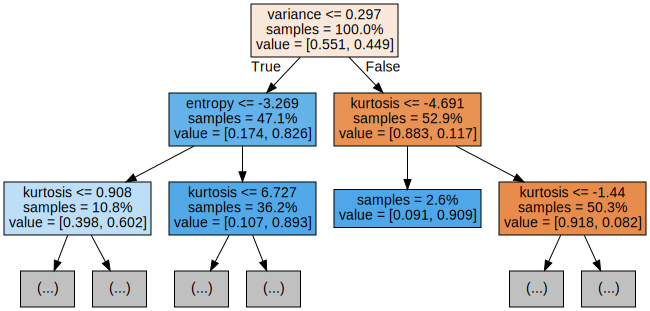

In [29]:
#visualize 3 trees
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree=Classifier.estimators_[i]
    dot_data=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)